# Level-3
## Task_2- Customer Preference Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Cognifyz/Dataset.csv')
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
cuisine_rating = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

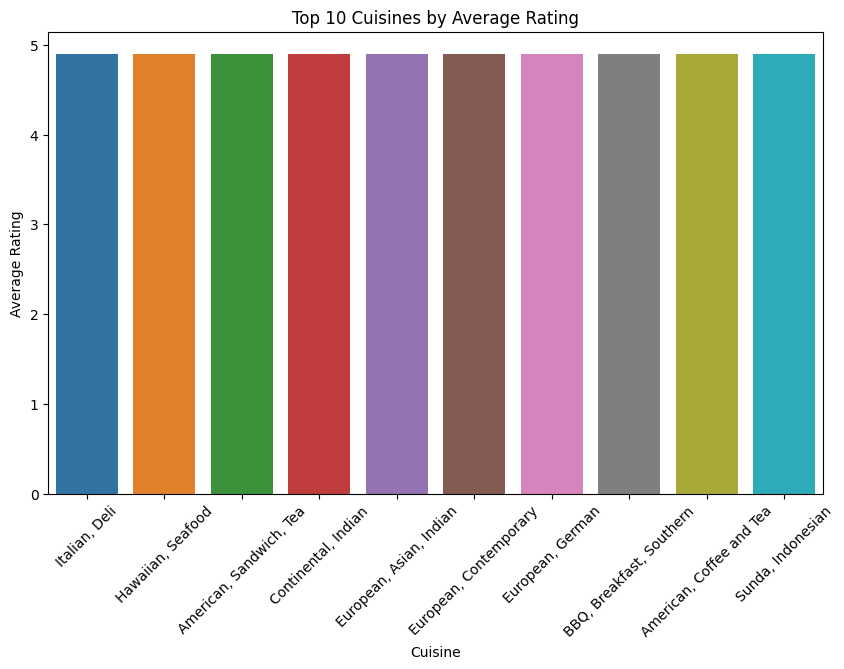

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_rating.head(10).index, y=cuisine_rating.head(10))
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [7]:
cuisine_votes = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

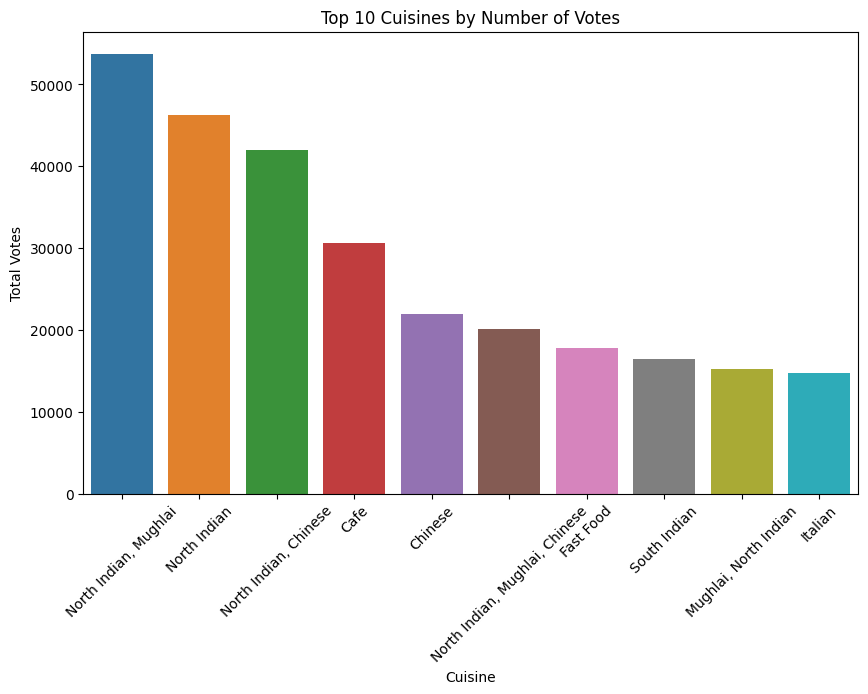

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_votes.head(10).index, y=cuisine_votes.head(10))
plt.title('Top 10 Cuisines by Number of Votes')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()

In [9]:
cuisine_mean_rating = data.groupby('Cuisines')['Aggregate rating'].mean()

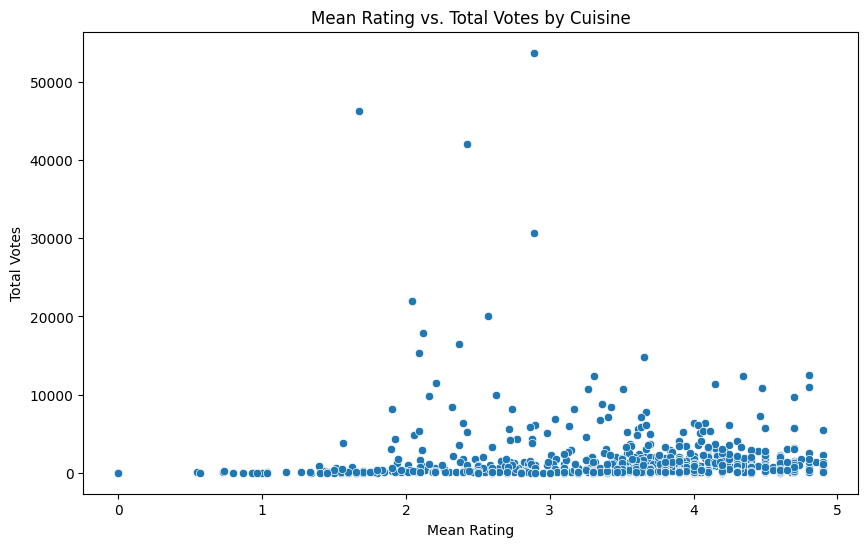

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cuisine_mean_rating, y=cuisine_votes)
plt.title('Mean Rating vs. Total Votes by Cuisine')
plt.xlabel('Mean Rating')
plt.ylabel('Total Votes')
plt.show()

In [11]:
price_range_rating = data.groupby('Price range')['Aggregate rating'].mean()

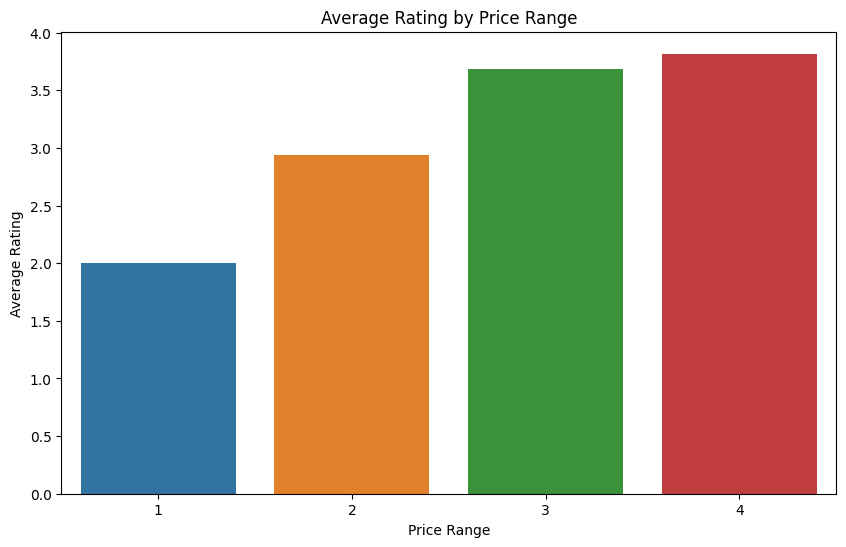

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_rating.index, y=price_range_rating)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

In [13]:
table_booking_rating = data.groupby('Has Table booking')['Aggregate rating'].mean()

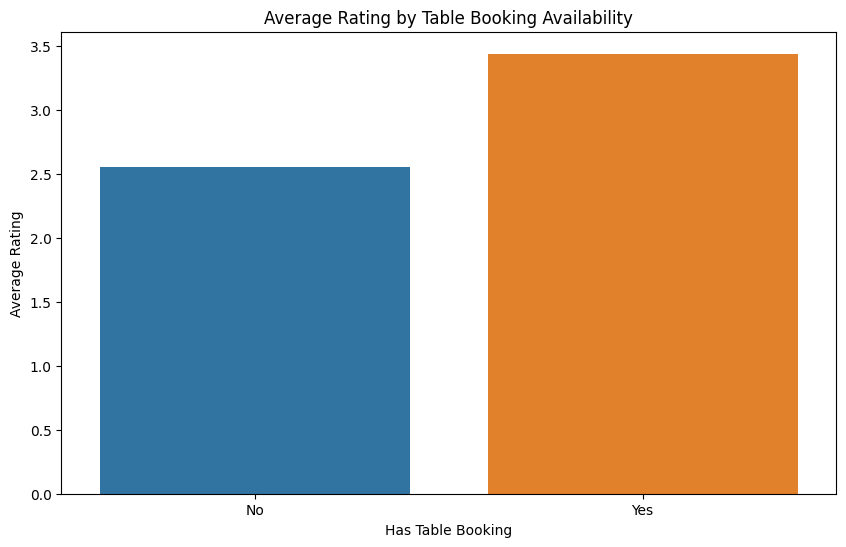

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=table_booking_rating.index, y=table_booking_rating)
plt.title('Average Rating by Table Booking Availability')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Rating')
plt.show()

In [15]:
online_delivery_rating = data.groupby('Has Online delivery')['Aggregate rating'].mean()

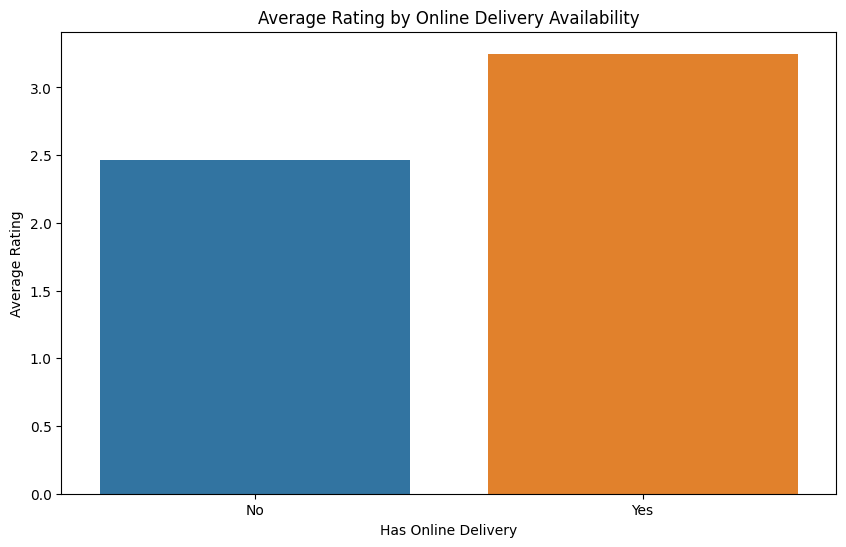

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=online_delivery_rating.index, y=online_delivery_rating)
plt.title('Average Rating by Online Delivery Availability')
plt.xlabel('Has Online Delivery')
plt.ylabel('Average Rating')
plt.show()

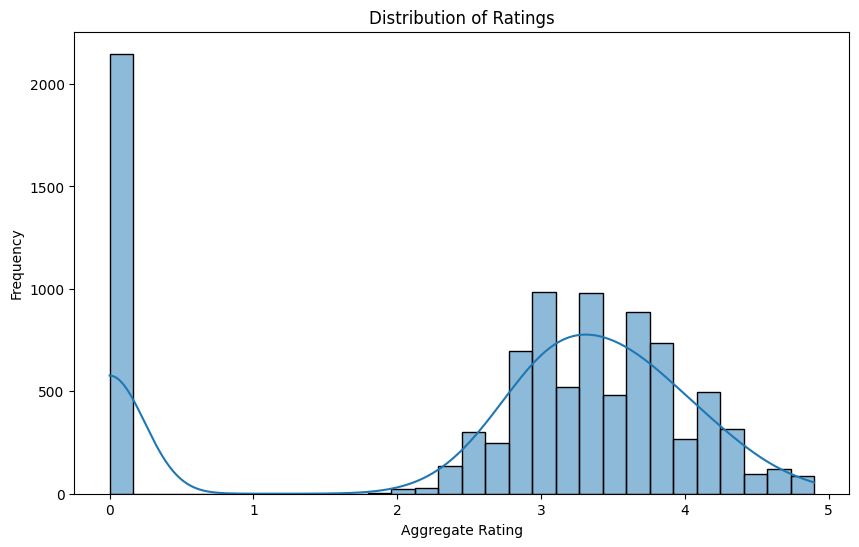

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Aggregate rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

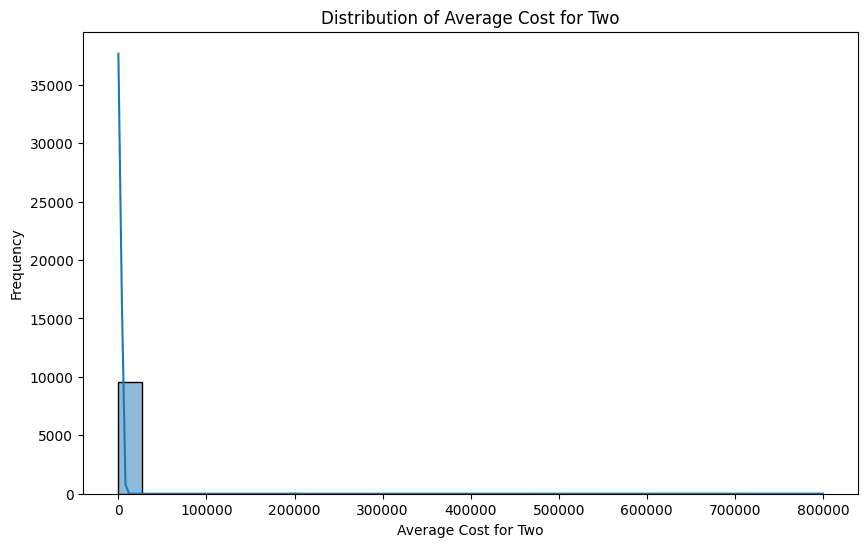

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Average Cost for two'], bins=30, kde=True)
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.show()